In [1]:
import numpy as np
from vMFMM import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
'''
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

model = vMFMM(3,'k++')
sample1 = normalize_features(np.random.multivariate_normal(mean = [2,10,10], cov = np.eye(3)*0.5, size=(50,)))
sample2 = normalize_features(np.random.multivariate_normal(mean = [10,2,10], cov = np.eye(3)*0.5, size=(50,)))
sample3 = normalize_features(np.random.multivariate_normal(mean = [10,10,2], cov = np.eye(3)*0.5, size=(50,)))
# sample4 = normalize_features(np.random.random((100,3)))

model.fit(np.concatenate([sample1,sample2,sample3], axis=0), 50, 30)

ax.scatter(sample1[:,0], sample1[:,1], sample1[:,2], c='r', marker='o',s=1)
ax.scatter(sample2[:,0], sample2[:,1], sample2[:,2], c='b', marker='^',s=1)
ax.scatter(sample3[:,0], sample3[:,1], sample3[:,2], c='orange', marker='.',s=1)
# ax.scatter(sample4[:,0], sample4[:,1], sample4[:,2], c='k', marker='x',s=1)
ax.scatter(model.mu[:,0], model.mu[:,1], model.mu[:,2], c='g', marker='+',s=50)
ax.set_xlim([0,1.2])
ax.set_ylim([0,1.2])
ax.set_zlim([0,1.2])
plt.show()
'''

"\nfig = plt.figure()\nax = fig.add_subplot(111, projection='3d')\n\nmodel = vMFMM(3,'k++')\nsample1 = normalize_features(np.random.multivariate_normal(mean = [2,10,10], cov = np.eye(3)*0.5, size=(50,)))\nsample2 = normalize_features(np.random.multivariate_normal(mean = [10,2,10], cov = np.eye(3)*0.5, size=(50,)))\nsample3 = normalize_features(np.random.multivariate_normal(mean = [10,10,2], cov = np.eye(3)*0.5, size=(50,)))\n# sample4 = normalize_features(np.random.random((100,3)))\n\nmodel.fit(np.concatenate([sample1,sample2,sample3], axis=0), 50, 30)\n\nax.scatter(sample1[:,0], sample1[:,1], sample1[:,2], c='r', marker='o',s=1)\nax.scatter(sample2[:,0], sample2[:,1], sample2[:,2], c='b', marker='^',s=1)\nax.scatter(sample3[:,0], sample3[:,1], sample3[:,2], c='orange', marker='.',s=1)\n# ax.scatter(sample4[:,0], sample4[:,1], sample4[:,2], c='k', marker='x',s=1)\nax.scatter(model.mu[:,0], model.mu[:,1], model.mu[:,2], c='g', marker='+',s=50)\nax.set_xlim([0,1.2])\nax.set_ylim([0,1.2])

In [39]:
model.mu

array([[ 0.17660129,  0.67406564,  0.71724996],
       [ 0.64722054,  0.7304389 ,  0.21809306],
       [ 0.67239167,  0.18446424,  0.71684195]])

In [20]:
from scipy.special import iv
print(iv(255,16))

7.43553953956e-275


In [8]:
import pickle
cluster_num = 200
file_num = 1
featDim = 512
feat_set = np.zeros((featDim, 0))
loc_set = np.zeros((5, 0), dtype='int')
img_set = []
for ii in range(file_num):
    print('loading file {0}/{1}'.format(ii+1, file_num))
    fname = '/export/home/qliu24/qing_voting_139/qing_voting_py/data/pool4_all_dumped_data'+str(ii)+'.pickle'
    with open(fname, 'rb') as fh:
        res, iloc, iimg = pickle.load(fh)
        feat_set = np.column_stack((feat_set, res))
        loc_set = np.column_stack((loc_set, iloc.astype('int')))
        img_set += iimg

print('all feat_set')
feat_set = feat_set.T
print(feat_set.shape)


loading file 1/1
all feat_set
(100000, 512)


In [3]:
model = vMFMM(200,'k++')
model.fit(feat_set, 16, 30)

start k++
finish cos_dis
k++ center 0
k++ center 10
k++ center 20
k++ center 30
k++ center 40
k++ center 50
k++ center 60
k++ center 70
k++ center 80
k++ center 90
k++ center 100
k++ center 110
k++ center 120
k++ center 130
k++ center 140
k++ center 150
k++ center 160
k++ center 170
k++ center 180
k++ center 190
finish k++
iter 0: -5.004956474086356,256.15117670771866
iter 1: -4.847226956995534,256.13590222826485
iter 2: -4.8166577413344696,256.1306212241972
iter 3: -4.800275943168064,256.1277909908318
iter 4: -4.79003793226386,256.1261207768088
iter 5: -4.783077057962347,256.12502273596203
iter 6: -4.777913392103562,256.1242468949686
iter 7: -4.773951501028354,256.12370124185003
iter 8: -4.770918279760436,256.1233356235192
iter 9: -4.768654775689116,256.12310933056665
iter 10: -4.766990682147365,256.1229701982904
iter 11: -4.765725006276636,256.1228762564113
iter 12: -4.7647111549145205,256.1228088181145
iter 13: -4.7638597854116025,256.1227606327813
iter 14: -4.763115464674466,256.12

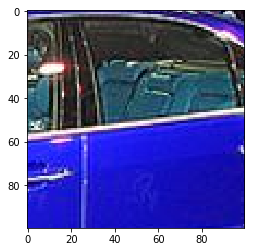

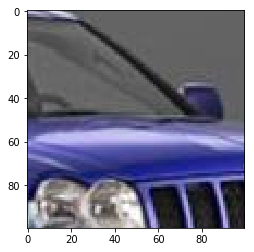

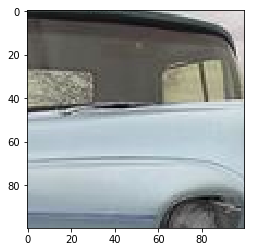

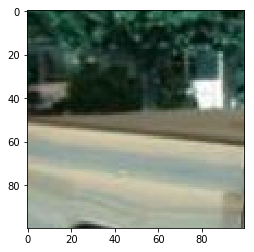

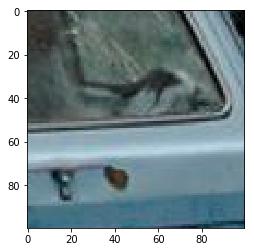

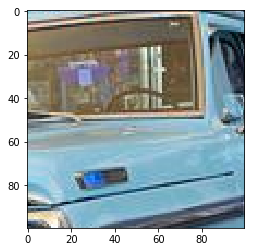

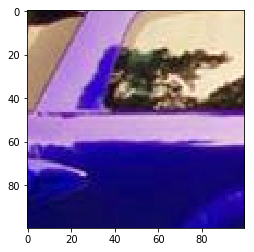

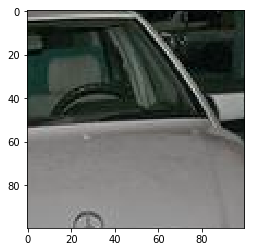

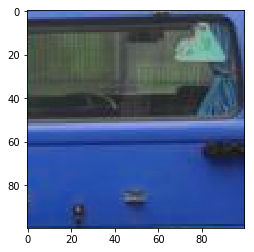

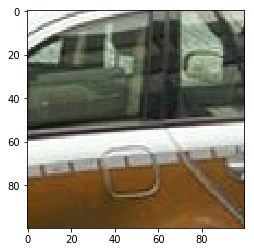

In [28]:
vc_i=100
for pp in range(50,60):
    idd = np.argsort(-model.p[:,vc_i])[pp]
    iloc = loc_set[:,idd]
    patch = img_set[iloc[0]][iloc[1]:iloc[3], iloc[2]:iloc[4], :]
    plt.imshow(patch)
    plt.show()

In [37]:
vc_i=100
center = model.mu[vc_i]
pp = 100
idd = np.argsort(-model.p[:,vc_i])[0:pp]
samples = model.features[idd,:]

cos_dis = np.dot(samples, center.reshape(-1,1))
print(np.mean(cos_dis))

0.62691179602


In [6]:
np.max(model.p[0:20,:],axis=1)

array([ 0.03076968,  0.05945113,  0.05239472,  0.23094784,  0.03680512,
        0.06909908,  0.13583527,  0.27259092,  0.06077814,  0.02853363,
        0.05455492,  0.03381132,  0.04171961,  0.03355285,  0.03729027,
        0.07896242,  0.05227584,  0.05056884,  0.55008715,  0.12928628])

In [38]:
save_path = '/export/home/qliu24/qing_voting_139/qing_voting_py/data/dictionary_PASCAL3D+_car_VGG16_pool4_K200_vMFMM.pickle'
with open(save_path, 'wb') as fh:
    pickle.dump([model.p, model.mu, model.pi], fh)